In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Dataset preparation

EXPLORATION OPPORTUNITY

- understanding each city top sale product
- (top and under) peformance of products, category, sub-category
- understanding product demand from aspect of time
- Customer behavior and retention

In [2]:
df = pd.read_csv('superstore.csv', encoding='latin1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
unique_count = df.nunique()
unique_count

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Cleaning

In [7]:
#check duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'Duplicate rows in dataset: {duplicate_rows}')

Duplicate rows in dataset: 0


In [8]:
# Change datatype for time columns
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [9]:
# Check consistency of object columns
column = "Sub-Category"

value_list = df[column].unique()
value_list.sort()
print(value_list)

['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables']


In [10]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4106,4107,US-2016-148334,2016-08-22,2016-08-26,Standard Class,DD-13570,Dorothy Dickinson,Consumer,United States,Houston,Texas,77041,Central,OFF-BI-10003676,Office Supplies,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",4.312,2,0.8,-6.8992
8320,8321,CA-2015-142937,2015-12-05,2015-12-06,First Class,SF-20065,Sandra Flanagan,Consumer,United States,Dallas,Texas,75220,Central,OFF-AR-10003582,Office Supplies,Art,"Boston Electric Pencil Sharpener, Model 1818, ...",45.040,2,0.2,4.5040
3885,3886,US-2017-127341,2017-01-29,2017-02-02,Standard Class,CK-12595,Clytie Kelty,Consumer,United States,Chicago,Illinois,60653,Central,OFF-BI-10001072,Office Supplies,Binders,"GBC Clear Cover, 8-1/2 x 11, unpunched, 25 cov...",12.128,4,0.8,-20.6176
5884,5885,CA-2016-136301,2016-03-13,2016-03-15,Second Class,EH-13765,Edward Hooks,Corporate,United States,San Francisco,California,94109,West,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,4912.590,3,0.0,196.5036
746,747,CA-2014-124429,2014-05-27,2014-05-27,Same Day,MH-17785,Maya Herman,Corporate,United States,San Diego,California,92105,West,FUR-TA-10002607,Furniture,Tables,KI Conference Tables,567.120,10,0.2,-28.3560


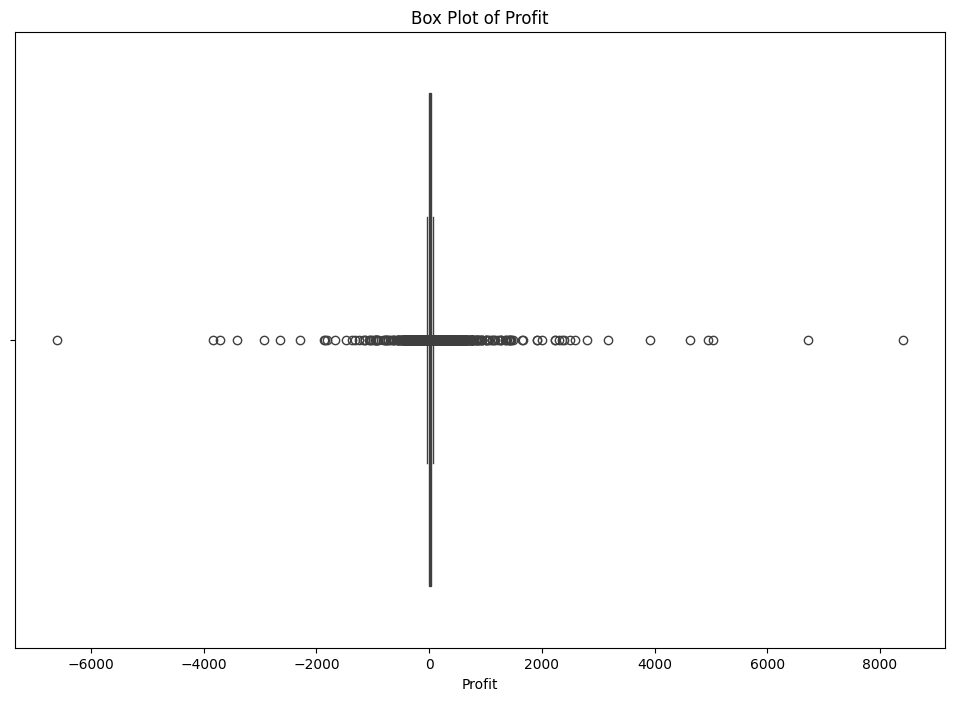

In [11]:
# checking outliers

plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Profit'])
plt.title('Box Plot of Profit')
plt.show()

# EDA

## Huge loss profit

In [12]:
# Filter the DataFrame to show rows with that minimum profit
rows_with_min_profit = df[df['Profit'] == df['Profit'].min()]

print("\n--- Row(s) with the minimum profit ---")
print(rows_with_min_profit)


--- Row(s) with the minimum profit ---
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7772    7773  CA-2016-108196 2016-11-25 2016-12-02  Standard Class   

     Customer ID  Customer Name   Segment        Country       City State  \
7772    CS-12505  Cindy Stewart  Consumer  United States  Lancaster  Ohio   

      Postal Code Region       Product ID    Category Sub-Category  \
7772        43130   East  TEC-MA-10000418  Technology     Machines   

                                   Product Name     Sales  Quantity  Discount  \
7772  Cubify CubeX 3D Printer Double Head Print  4499.985         5       0.7   

        Profit  
7772 -6599.978  


it seems reasonable profit due to high discount for a high price product. but we can use this for deeper diagnostic analysis to understand why these losses occur and what actions a business might take to mitigate them

In [13]:
# investigate costumer Cindy Stewart with customer id CS-12505
# to see if the usage of high discount is suspicious
df_cindy = df[df['Customer ID'] == 'CS-12505']

df_cindy = df_cindy.sort_values(by='Discount', ascending=False)
df_cindy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
7771,7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,456.588,2,0.7,-304.3920
1477,1478,CA-2016-121958,2016-11-13,2016-11-17,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Thomasville,North Carolina,27360,South,OFF-SU-10000381,Office Supplies,Supplies,Acme Forged Steel Scissors with Black Enamel H...,52.136,7,0.2,5.8653
7773,7774,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,TEC-AC-10000926,Technology,Accessories,NETGEAR RangeMax WNR1000 Wireless Router,59.976,3,0.2,11.9952
1507,1508,CA-2016-134208,2016-09-17,2016-09-23,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Columbus,Georgia,31907,South,TEC-MA-10004458,Technology,Machines,Lexmark X 9575 Professional All-in-One Color P...,396.000,4,0.0,190.0800


from this transaction log confirms the huge loss is not due to customer abusing discount but is a result of a highly aggressive discount applied across multiple items within a single order

## Top Product

In [14]:
# Calculate profit margin
df['Profit Margin'] = df['Profit'] / df['Sales'] * 100

### Profit and sales

In [15]:
product_profitibilty = df.groupby(['Category', 'Sub-Category', 'Product Name'])['Profit'].sum().reset_index()
product_profitibilty = product_profitibilty.sort_values(by='Profit', ascending=False)
print('Top 20 Products by absolute profit')
product_profitibilty.head(20)

Top 20 Products by absolute profit


,Category,Sub-Category,Product Name,Profit
1592,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,25199.9280
716,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
1595,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,6983.8836
1589,Technology,Copiers,Canon PC1060 Personal Laser Copier,4570.9347
1620,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
1601,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,3772.9461
1598,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1554,Technology,Accessories,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
769,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,3345.2823
1660,Technology,Machines,Zebra ZM400 Thermal Label Printer,3343.5360


In [16]:
product_profit_margin = df.groupby(['Category', 'Sub-Category', 'Product Name'])['Profit Margin'].sum().reset_index()
product_profit_margin = product_profit_margin.sort_values(by='Profit Margin', ascending=False)
print('Top 20 Products by profit margin')
product_profit_margin.head(20)

Top 20 Products by profit margin


,Category,Sub-Category,Product Name,Profit Margin
880,Office Supplies,Envelopes,Staple envelope,2077.00
1018,Office Supplies,Paper,Easy-staple paper,1985.25
916,Office Supplies,Fasteners,Staples,1752.75
1479,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,562.00
980,Office Supplies,Labels,Avery File Folder Labels,547.75
1099,Office Supplies,Paper,Xerox 1881,537.50
630,Office Supplies,Art,Staples in misc. colors,515.25
1259,Office Supplies,Paper,Xerox 226,502.00
1117,Office Supplies,Paper,Xerox 1898,476.00
1112,Office Supplies,Paper,Xerox 1893,475.25


In [17]:
sub_category_profit = df.groupby('Sub-Category')['Profit'].mean().reset_index()
top_sub_category = sub_category_profit.sort_values(by='Profit', ascending=False,).reset_index(drop=True)
top_sub_category

,Sub-Category,Profit
0,Copiers,817.909190
1,Accessories,54.111788
2,Phones,50.073938
3,Chairs,43.095894
4,Appliances,38.922758
5,Machines,29.432669
6,Envelopes,27.418019
7,Storage,25.152277
8,Paper,24.856620
9,Binders,19.843574


In [18]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
top_sub_category = sub_category_sales.sort_values(by='Sales', ascending=False,).reset_index(drop=True)
top_sub_category

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


In [19]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
top_category = category_profit.sort_values(by='Profit', ascending=False,).reset_index(drop=True)
top_category

,Category,Profit
0,Technology,145454.9481
1,Office Supplies,122490.8008
2,Furniture,18451.2728


In [20]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
top_category = category_sales.sort_values(by='Sales', ascending=False,).reset_index(drop=True)
top_category

,Category,Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


### Highest demand

In [21]:
product_sold = df.groupby('Sub-Category')['Quantity'].sum().reset_index()
top_category = product_sold.sort_values(by='Quantity', ascending=False,).reset_index(drop=True)
top_category

,Sub-Category,Quantity
0,Binders,5974
1,Paper,5178
2,Furnishings,3563
3,Phones,3289
4,Storage,3158
5,Art,3000
6,Accessories,2976
7,Chairs,2356
8,Appliances,1729
9,Labels,1400


### Profit and sales according time aspect

In [22]:
df['Month Order'] = df['Order Date'].dt.month
df['Year Order'] = df['Order Date'].dt.year

In [23]:
# Group and sum profit
monthly_product_profit = df.groupby(['Year Order', 'Month Order', 'Sub-Category'])['Profit'].sum().reset_index()
idxmax = monthly_product_profit.groupby(['Year Order', 'Month Order'])['Profit'].idxmax()
top_product_monthly = monthly_product_profit.loc[idxmax].reset_index(drop=True)
top_product_monthly

,Year Order,Month Order,Sub-Category,Profit
0,2014,1,Chairs,1058.0256
1,2014,2,Accessories,467.8996
2,2014,3,Phones,1290.1895
3,2014,4,Phones,1100.8866
4,2014,5,Binders,1197.6297
5,2014,6,Phones,1437.3990
6,2014,7,Phones,572.6974
7,2014,8,Paper,879.6907
8,2014,9,Binders,5129.9685
9,2014,10,Phones,1204.2965


## Strategic Discounting

Analyze past discount to evaluate for upcoming discount period. We are going to see the effectiveness on each discount range for variety sub-categories

In [24]:
bins = [-0.01, 0, 0.2, 0.4, 0.6, 1.0]
labels = ['0%', '1–20%', '21–40%', '41–60%', '>60%']

df["Discount Range"] = pd.cut(df['Discount'], bins=bins, labels=labels)

In [25]:
# Calculate sales, profit, quaitity and profit margin
discount_summary = df.groupby(['Sub-Category', 'Discount Range']).agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Quantity': 'mean',
    'Profit Margin': 'mean',
    'Discount': 'count'
}).rename(columns={'Discount': 'Order Count'}).reset_index()

discount_summary = discount_summary.dropna(subset=['Discount Range'])

C:\Users\reizi\AppData\Local\Temp\ipykernel_24348\552792921.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_summary = df.groupby(['Sub-Category', 'Discount Range']).agg({


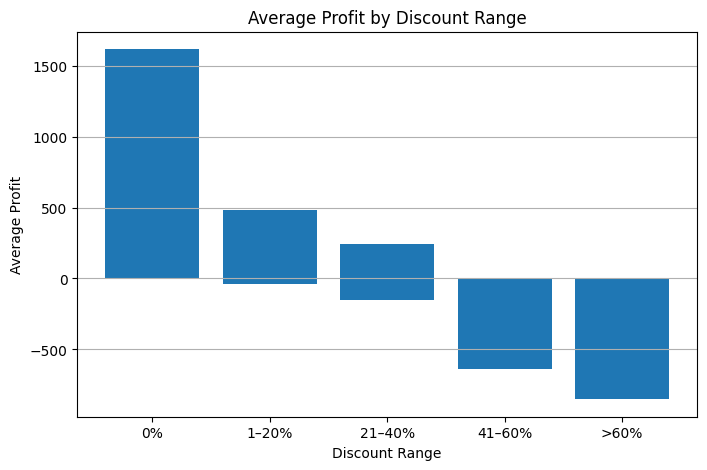

In [26]:
plt.figure(figsize=(8,5))
plt.bar(discount_summary['Discount Range'], discount_summary['Profit'])
plt.title('Average Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Profit')
plt.grid(axis='y')
plt.show()

In [27]:
# show the best profit
discount_summary = discount_summary.sort_values(['Sub-Category', 'Profit'], ascending=[True, False])

print('Discount effectiveness summary')
discount_summary

Discount effectiveness summary


,Sub-Category,Discount Range,Sales,Profit,Quantity,Profit Margin,Order Count
0,Accessories,0%,251.317006,74.924106,3.895966,28.906582,471
1,Accessories,1–20%,161.217132,21.866388,3.753289,10.842928,304
2,Accessories,21–40%,NaN,NaN,NaN,NaN,0
3,Accessories,41–60%,NaN,NaN,NaN,NaN,0
4,Accessories,>60%,NaN,NaN,NaN,NaN,0
5,Appliances,0%,288.067122,85.548842,3.767528,29.468635,271
6,Appliances,1–20%,203.776852,27.999301,3.695312,13.116319,128
9,Appliances,>60%,50.485582,-128.800615,3.507463,-253.358209,67
7,Appliances,21–40%,NaN,NaN,NaN,NaN,0
8,Appliances,41–60%,NaN,NaN,NaN,NaN,0


In [28]:
# Filter to show only ranges where Profit is positive
profitable_discounts = discount_summary[discount_summary['Profit'] > 0]
print("\nProfitable Discount Ranges per Sub-Category:")
profitable_discounts


Profitable Discount Ranges per Sub-Category:


,Sub-Category,Discount Range,Sales,Profit,Quantity,Profit Margin,Order Count
0,Accessories,0%,251.317006,74.924106,3.895966,28.906582,471
1,Accessories,1–20%,161.217132,21.866388,3.753289,10.842928,304
5,Appliances,0%,288.067122,85.548842,3.767528,29.468635,271
6,Appliances,1–20%,203.776852,27.999301,3.695312,13.116319,128
10,Art,0%,36.173976,10.804419,3.823293,31.407631,498
11,Art,1–20%,30.550846,3.849619,3.677852,14.731544,298
15,Binders,0%,242.817448,116.660091,3.830861,47.537092,337
16,Binders,1–20%,149.114555,51.339981,3.886562,34.328098,573
20,Bookcases,0%,532.266333,101.261862,3.516667,19.433333,60
21,Bookcases,1–20%,555.102219,15.811160,3.724490,1.328031,98


we can see which sub-category that is cannibilize by discounts if the highest profit is where the product being sale at 0% discount.

In [29]:
# currently unused

# sort discount summary by the highest and get the index
top_subcats = discount_summary.groupby('Sub-Category')['Sales'].sum().nlargest(5).index
print('top 5 sales amount for sub-categories')
print(top_subcats)

df_top5 = df[df['Sub-Category'].isin(top_subcats)].copy()

top 5 sales amount for sub-categories
Index(['Machines', 'Copiers', 'Tables', 'Bookcases', 'Chairs'], dtype='object', name='Sub-Category')


## Understanding User Segment

### Profit and Sales

In [30]:
# split into sub dataframe for different segment
segment_summary = df.groupby('Segment').agg({
    'Sales' : ['sum', 'mean'],
    'Profit' : ['sum', 'mean'],
    'Order ID' : ['nunique'],
    'Customer ID' : ['nunique'],
}).reset_index()

segment_summary.columns = ['Segment', 'Total Sales', 'Avg Sales', 'Total Profit', 'Avg Profit', 'Unique Orders', 'Unique Customers']
segment_summary = segment_summary.sort_values('Total Profit', ascending=False)

segment_summary

,Segment,Total Sales,Avg Sales,Total Profit,Avg Profit,Unique Orders,Unique Customers
0,Consumer,1.161401e+06,223.733644,134119.2092,25.836873,2586,409
1,Corporate,7.061464e+05,233.823300,91979.1340,30.456667,1514,236
2,Home Office,4.296531e+05,240.972041,60298.6785,33.818664,909,148


<function matplotlib.pyplot.show(close=None, block=None)>

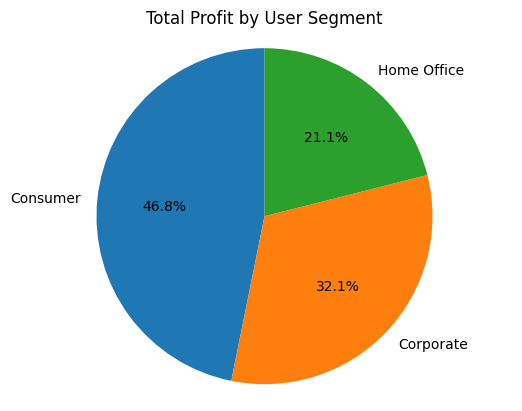

In [31]:
plt.pie(
    segment_summary['Total Profit'],
    labels=segment_summary['Segment'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Total Profit by User Segment')
plt.axis('equal')
plt.show

### RFM

RFM reveal hidden customer that give a huge impact for the store, we can later give an variety engagement to customers with different Behavior.

In [32]:
# Find the latest order and set as baseline and prepare rfm information for each customer
recent_date = df['Order Date'].max() + pd.Timedelta(days=1)
    
rfm_customers = df.groupby('Customer ID').agg({
    'Order Date' : lambda x: (recent_date - x.max()).days, # Recency
    'Order ID' : 'nunique', # Frequency
    'Sales' : 'sum', # Monetary
    'Profit' : 'sum' # For later analysis
}).reset_index()

rfm_customers.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Total Profit']

In [33]:
# For Recency: lower days = better (reverse labels)
rfm_customers['R Score'] = pd.qcut(rfm_customers['Recency'], 5, labels=[5,4,3,2,1])
rfm_customers['F Score'] = pd.qcut(rfm_customers['Frequency'], 5, labels=[1,2,3,4,5])
rfm_customers['M Score'] = pd.qcut(rfm_customers['Monetary'], 5, labels=[1,2,3,4,5])

rfm_customers['RFM Score'] = rfm_customers['R Score'].astype(str) + rfm_customers['F Score'].astype(str) + rfm_customers['M Score'].astype(str)

In [34]:
# Give label to different rank of customer

def rfm_segment(row):
    if row['RFM Score'] in ['555', '554', '545', '544', '455', '454']:
        return 'Champions'  # High all
    elif row['RFM Score'][0] in ['4', '5'] and row['RFM Score'][1:] in ['33', '34', '43', '44']: 
        return 'Loyal'
    elif row['RFM Score'][0] in ['3', '4', '5'] and row['RFM Score'][1] == '1': 
        return 'Newbies'
    elif row['RFM Score'][0] in ['1', '2'] and row['RFM Score'][1:] in ['44', '45', '54', '55']: 
        return 'At Risk'
    else: 
        return 'Others'  # Catch-all; refine with more rules

rfm_customers['RFM Segment'] = rfm_customers.apply(rfm_segment, axis=1)

In [35]:
# Analyze profitability by RFM segment
rfm_summary = rfm_customers.groupby('RFM Segment').agg({
    'Customer ID': 'count',    # Number of customers
    'Monetary': 'mean',        # Avg spend
    'Total Profit': ['sum', 'mean']  # Total and avg profit
}).reset_index()

rfm_summary.columns = ['RFM Segment', 'Customer Count', 'Avg Monetary', 'Total Profit', 'Avg Profit']
rfm_summary = rfm_summary.sort_values('Total Profit', ascending=False)

print("RFM Segments and Profitability:")
rfm_summary

RFM Segments and Profitability:


,RFM Segment,Customer Count,Avg Monetary,Total Profit,Avg Profit
4,Others,531,2566.983195,168372.8672,317.086379
1,Champions,73,5409.753734,50691.7138,694.407038
0,At Risk,39,5630.225577,37229.8374,954.611215
3,Newbies,82,1642.096795,18235.6115,222.385506
2,Loyal,68,2720.441562,11866.9918,174.514585


with this RFM segments we can try persuade each user with different strategy to make an effective deal for them

## Mitigating Loss

In [36]:
losses = df[df['Profit'] < 0].copy()

loss_product = losses.groupby(['Category', 'Sub-Category', 'Product Name']).agg(
    {'Profit': 'sum',
     'Order ID': 'count'
}).reset_index().rename(columns={'Profit': 'Total Loss', 'Order ID': 'Total Order'})

loss_product = loss_product.sort_values('Total Loss', ascending=True)

print('Top 20 Loss Product')
loss_product.head(20)

Top 20 Loss Product


,Category,Sub-Category,Product Name,Total Loss,Total Order
649,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,-9239.9692,2
409,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,-6859.3896,3
658,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,-5269.9690,3
414,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,-5098.5660,6
412,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,-4162.0336,4
650,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,-3839.9904,1
401,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,-3431.6730,2
246,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-3107.5272,4
452,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,-2929.4845,1
240,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,-2545.2600,6


machines and binders needs more attention with a strategy to reduce the loss

In [37]:
# Discount distribution in losses
print("Discount Stats in Losses:")
print(losses['Discount'].describe())

Discount Stats in Losses:
count    1871.000000
mean        0.480887
std         0.235080
min         0.100000
25%         0.200000
50%         0.400000
75%         0.700000
max         0.800000
Name: Discount, dtype: float64


In [ ]:
# Group losses by geography and category
loss_attribution = losses.groupby(['Region', 'State', 'City', 'Category']).agg({
    'Profit': 'sum',
    'Discount': 'mean',  # Avg discount in losses
    'Order ID': 'count'
}).reset_index().rename(columns={'Profit': 'Total Loss', 'Order ID': 'Loss Count'})

loss_attribution = loss_attribution.sort_values('Total Loss')
print("Top Loss Pockets by Geography/Category:")
loss_attribution.head(10)

Top Loss Pockets by Geography/Category:


,Region,State,City,Category,Total Loss,Discount,Loss Count
92,Central,Texas,Houston,Office Supplies,-10187.9579,0.700000,96
10,Central,Illinois,Chicago,Office Supplies,-7536.5801,0.680000,80
218,East,Pennsylvania,Philadelphia,Furniture,-7358.6039,0.343103,58
184,East,Ohio,Lancaster,Technology,-6864.3457,0.375000,4
220,East,Pennsylvania,Philadelphia,Technology,-6118.7738,0.390141,71
219,East,Pennsylvania,Philadelphia,Office Supplies,-6113.3634,0.559504,121
129,Central,Texas,San Antonio,Office Supplies,-5928.1349,0.725000,16
151,East,New York,New York City,Furniture,-3966.0226,0.305000,40
274,South,North Carolina,Burlington,Technology,-3839.9904,0.500000,1
9,Central,Illinois,Chicago,Furniture,-3516.4663,0.483333,66


Pearson Correlations:
Sales       0.479064
Quantity    0.066253
Discount   -0.219487
Profit      1.000000
Name: Profit, dtype: float64


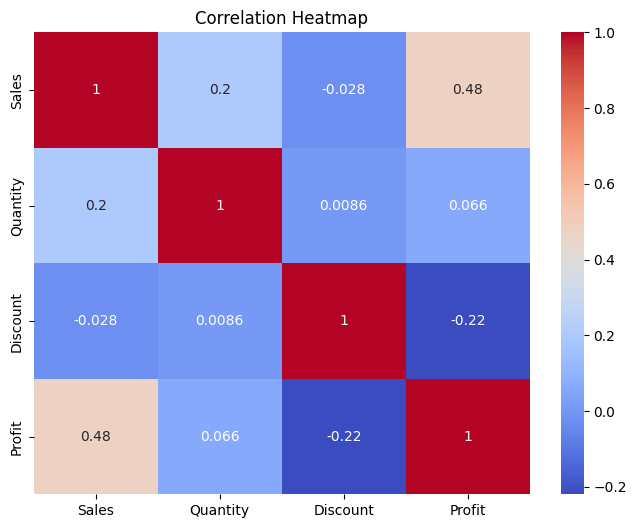

In [ ]:
# Numeric columns for correlation
corr_df = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Pearson correlation matrix
corr_matrix = corr_df.corr(method='pearson')
print("Pearson Correlations:")
print(corr_matrix['Profit'])  # Focus on Profit correlations

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

the corelation shows discounts is weak contribution to lower profit but there is still a role for discount to worsen profit, therefore prioritize discount threshold for loss product might be a good strategy consideration

In [40]:
losses.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Month Order,Year Order,Discount Range
590,591,US-2016-156986,2016-03-20,2016-03-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Salem,Oregon,97301,West,OFF-BI-10002498,Office Supplies,Binders,Clear Mylar Reinforcing Strips,16.821,3,0.7,-12.8961,-76.666667,3,2016,>60%


In [ ]:


# Monthly losses (absolute)
monthly_losses = losses.groupby(['Year Order', 'Month Order'])['Profit'].sum().reset_index(name='Absolute Loss')

# Add discount trend
monthly_discount = df.groupby(['Year Order', 'Month Order'])['Discount'].mean().reset_index(name='Avg Discount')

# Merge and plot
trends = monthly_losses.merge(monthly_discount, on=['Year Order', 'Month Order'])
trends

,Year Order,Month Order,Absolute Loss,Avg Discount
0,2014,1,-655.1903,0.126582
1,2014,2,-101.3745,0.176087
2,2014,3,-4437.9234,0.167516
3,2014,4,-922.6697,0.110000
4,2014,5,-1757.4199,0.155328
5,2014,6,-1296.7398,0.172000
6,2014,7,-4605.2276,0.171678
7,2014,8,-1125.5681,0.131046
8,2014,9,-7132.7476,0.159963
9,2014,10,-1550.0312,0.160063


loss spike happened on most Q4, suggesting year-end holliday drive a deeper loss. losses worsen overtime and peaking in winter/fall